In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
Beer_Data = pd.read_csv('train.csv')

In [3]:
Beer_Data.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [4]:
Beer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

# After visualising aboove data we notice that some of the coumns are only for unique indentification. Thus, those columns can be dropped from the dataset.
# here is the list of columns to be dropped from table
index

user/profile/name

review/timeStruct


In [5]:
Beer_Data = Beer_Data.drop(['user/profileName', 'review/timeStruct', 'beer/beerId'], axis=1)

In [6]:
Beer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/brewerId      37500 non-null  int64  
 3   beer/name          37500 non-null  object 
 4   beer/style         37500 non-null  object 
 5   review/appearance  37500 non-null  float64
 6   review/aroma       37500 non-null  float64
 7   review/overall     37500 non-null  float64
 8   review/palate      37500 non-null  float64
 9   review/taste       37500 non-null  float64
 10  review/text        37490 non-null  object 
 11  review/timeUnix    37500 non-null  int64  
 12  user/ageInSeconds  7856 non-null   float64
 13  user/birthdayRaw   7856 non-null   object 
 14  user/birthdayUnix  7856 non-null   float64
 15  user/gender        15314 non-null  object 
dtypes: float64(8), int64(3

# Data Cleaning

In [7]:
Beer_Data.shape

(37500, 16)

In [8]:
Beer_Data = Beer_Data.rename(columns={'user/gender': 'gender', 'beer/ABV':'Alcohol_Content', 'beer/name':'BeerName', 'beer/brewerId':'BrewerID'})

In [9]:
Beer_Data.gender.value_counts()

gender
Male      15069
Female      245
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='Alcohol_Content'>

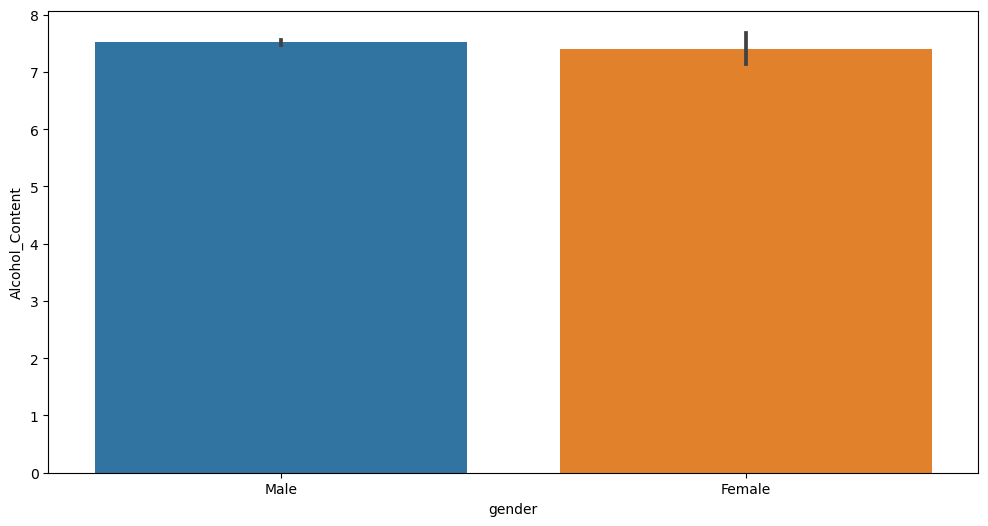

In [10]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'gender', y = 'Alcohol_Content', data = Beer_Data)

In [11]:
data = Beer_Data.Alcohol_Content.value_counts().size

In [12]:
Beer_Data.Alcohol_Content.value_counts()

Alcohol_Content
6.50     2096
5.00     2015
8.30     1890
6.60     1848
9.40     1847
         ... 
3.75        1
6.32        1
12.80       1
57.70       1
30.86       1
Name: count, Length: 126, dtype: int64

In [13]:
data

126

In [14]:
Beer_Data.BeerName.value_counts()

BeerName
Founders Breakfast Stout                   1883
Founders KBS (Kentucky Breakfast Stout)    1441
Founders Centennial IPA                    1064
Founders Red's Rye PA                      1051
Founders Dirty Bastard                      983
                                           ... 
Bluffdiver IPA                                1
Montgomery Mild                               1
Willy's Crown Jewels                          1
Sokol Izolda                                  1
MoJo Belgian Style Abbey Dubbel               1
Name: count, Length: 1688, dtype: int64

In [15]:
female_data = Beer_Data[Beer_Data['gender']=='Female']

In [16]:
female_data.shape

(245, 16)

In [17]:
new_table_female = female_data.groupby('BeerName').size().reset_index(name='Count')

In [18]:
new_table_female.head(10)

,BeerName,Count
0,"""The Wind Cried Mari..."" Scottish Heather Ale",1
1,1906 Reserva Especial,1
2,Aecht Schlenkerla Helles Lagerbier,2
3,Aecht Schlenkerla Rauchbier MÃ¤rzen,6
4,Aecht Schlenkerla Rauchbier Urbock,1
5,Aecht Schlenkerla Rauchbier Weizen,2
6,American Pale Ale,4
7,Ashland Amber,2
8,B.O.R.I.S. The Crusher Oatmeal-Imperial Stout,8
9,Bannatyne's Scotch Ale,1


In [19]:
male_data = Beer_Data[Beer_Data['gender']=='Male']

In [20]:
male_data.shape

(15069, 16)

In [21]:
new_table_male = male_data.groupby('BeerName').size().reset_index(name='Count')

In [22]:
new_table_male.head()

,BeerName,Count
0,"""The Wind Cried Mari..."" Scottish Heather Ale",6
1,1 A.M. Ale,3
2,13th Anniversary Imperial India Pale Ale,1
3,1871 Lager,2
4,1906 Reserva Especial,3


In [23]:
new_table_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BeerName  1064 non-null   object
 1   Count     1064 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.8+ KB


In [24]:
new_table_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BeerName  108 non-null    object
 1   Count     108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [25]:
full_join_df = pd.merge(new_table_male, new_table_female, on='BeerName', how='outer')

In [26]:
full_join_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BeerName  1073 non-null   object 
 1   Count_x   1064 non-null   float64
 2   Count_y   108 non-null    float64
dtypes: float64(2), object(1)
memory usage: 25.3+ KB


In [27]:
full_join_df.fillna(0.0, inplace=True)

In [28]:
full_join_df.rename(columns={'Count_x':'male', 'Count_y':'female'}, inplace=True)

In [29]:
full_join_df.head()

,BeerName,male,female
0,"""The Wind Cried Mari..."" Scottish Heather Ale",6.0,1.0
1,1 A.M. Ale,3.0,0.0
2,13th Anniversary Imperial India Pale Ale,1.0,0.0
3,1871 Lager,2.0,0.0
4,1906 Reserva Especial,3.0,1.0


In [30]:
full_join_df.shape

(1073, 3)

In [31]:
full_join_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BeerName  1073 non-null   object 
 1   male      1073 non-null   float64
 2   female    1073 non-null   float64
dtypes: float64(2), object(1)
memory usage: 25.3+ KB


In [32]:
male = Beer_Data.loc[Beer_Data['beer/style'] == 'American Pale Ale (APA)', 'gender'].values[0]
print(male)
female = Beer_Data.loc[Beer_Data['index'] == 7498 , 'gender'].values[0]
print(female)
def compare_columns(row):
    if row['female'] > row['male']:
        return female
    elif row['male'] > row['female']:
        return male
    else:
        return male

Male
Female


In [33]:
full_join_df['gender'] = full_join_df.apply(compare_columns, axis=1)

In [34]:
full_join_df.describe()

,male,female
count,1073.000000,1073.000000
mean,14.043802,0.228332
std,52.298788,1.033514
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,5.000000,0.000000
max,783.000000,17.000000


In [35]:
full_join_df.gender.value_counts()

gender
Male      1064
Female       9
Name: count, dtype: int64

In [36]:
full_join_df.head()

,BeerName,male,female,gender
0,"""The Wind Cried Mari..."" Scottish Heather Ale",6.0,1.0,Male
1,1 A.M. Ale,3.0,0.0,Male
2,13th Anniversary Imperial India Pale Ale,1.0,0.0,Male
3,1871 Lager,2.0,0.0,Male
4,1906 Reserva Especial,3.0,1.0,Male


In [37]:
full_join_df = full_join_df.drop(['male', 'female'], axis=1)

In [38]:
full_join_df.gender.value_counts()

gender
Male      1064
Female       9
Name: count, dtype: int64

In [39]:
full_join_df.head(3)

,BeerName,gender
0,"""The Wind Cried Mari..."" Scottish Heather Ale",Male
1,1 A.M. Ale,Male
2,13th Anniversary Imperial India Pale Ale,Male


In [40]:
temp = full_join_df['BeerName'] == 'Founders KBS (Kentucky Breakfast Stout)'
filtered_data = full_join_df[temp]
print(filtered_data['gender'])

386    Male
Name: gender, dtype: object


In [41]:
for index, row in Beer_Data[Beer_Data['gender'].isnull()].iterrows():
    # Filter full_join_df based on 'BeerName'
    temp = full_join_df['BeerName'] == row['BeerName']
    filtered_data = full_join_df[temp]
    
    # If there are matches, assign the first matching 'gender' value
    if not filtered_data.empty:
        Beer_Data.at[index, 'gender'] = filtered_data['gender'].values[0]
        
        
            

In [42]:
Beer_Data.head(1000)

,index,Alcohol_Content,BrewerID,BeerName,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,gender
0,40163,5.0,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,1229398690,NaN,NaN,NaN,Male
1,8135,11.0,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,1218238738,NaN,NaN,NaN,Male
2,10529,4.7,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,1101492422,NaN,NaN,NaN,Male
3,44610,4.4,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male
4,37062,4.4,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,1299912708,NaN,NaN,NaN,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40249,5.3,1315,Weltenburger Hefe-Weissbier Dunkel,Dunkelweizen,5.0,2.5,2.0,2.0,1.5,From a well-chilled half-liter bottle. This po...,1170464835,NaN,NaN,NaN,Male
996,40310,5.5,1315,Weltenburger Kloster Anno 1050,MÃ¤rzen / Oktoberfest,4.0,4.0,3.5,4.0,3.5,Appearance This one poured a dark orange in c...,1094777607,NaN,NaN,NaN,Male
997,16324,12.0,1199,Founders Devil Dancer,American Double / Imperial IPA,3.5,3.5,3.5,4.5,4.0,Dark orange/amber in color. This light brown h...,1212455568,1.037455e+09,"Jan 26, 1982",380880000.0,Male
998,10072,5.3,365,Pike Pale Heirloom Amber Ale,American Amber / Red Ale,3.5,4.0,3.0,3.0,3.0,"The beer pours a very cloudy, opaque dark oran...",1260993991,1.063721e+09,"Mar 28, 1981",354614400.0,Male


In [43]:
Beer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   Alcohol_Content    37500 non-null  float64
 2   BrewerID           37500 non-null  int64  
 3   BeerName           37500 non-null  object 
 4   beer/style         37500 non-null  object 
 5   review/appearance  37500 non-null  float64
 6   review/aroma       37500 non-null  float64
 7   review/overall     37500 non-null  float64
 8   review/palate      37500 non-null  float64
 9   review/taste       37500 non-null  float64
 10  review/text        37490 non-null  object 
 11  review/timeUnix    37500 non-null  int64  
 12  user/ageInSeconds  7856 non-null   float64
 13  user/birthdayRaw   7856 non-null   object 
 14  user/birthdayUnix  7856 non-null   float64
 15  gender             36564 non-null  object 
dtypes: float64(8), int64(3

In [44]:
Beer_Data.gender.value_counts()

gender
Male      36297
Female      267
Name: count, dtype: int64

In [45]:
for index, row in Beer_Data.iterrows():
    if pd.isnull(row['gender']):
        Beer_Data.at[index, 'gender'] = 'Male'

In [46]:
Beer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   Alcohol_Content    37500 non-null  float64
 2   BrewerID           37500 non-null  int64  
 3   BeerName           37500 non-null  object 
 4   beer/style         37500 non-null  object 
 5   review/appearance  37500 non-null  float64
 6   review/aroma       37500 non-null  float64
 7   review/overall     37500 non-null  float64
 8   review/palate      37500 non-null  float64
 9   review/taste       37500 non-null  float64
 10  review/text        37490 non-null  object 
 11  review/timeUnix    37500 non-null  int64  
 12  user/ageInSeconds  7856 non-null   float64
 13  user/birthdayRaw   7856 non-null   object 
 14  user/birthdayUnix  7856 non-null   float64
 15  gender             37500 non-null  object 
dtypes: float64(8), int64(3

<Axes: xlabel='gender', ylabel='count'>

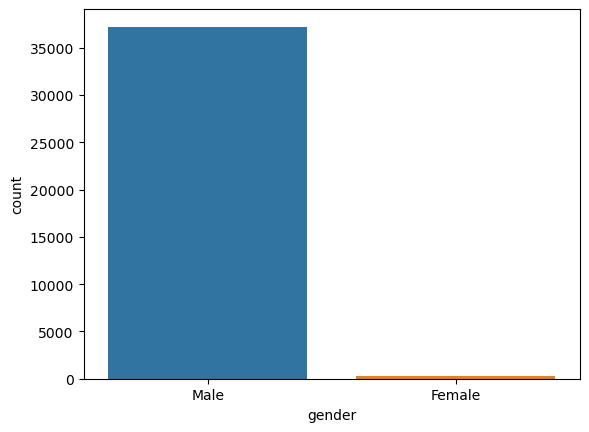

In [47]:
sns.countplot(data=Beer_Data, x='gender')

In [48]:
Beer_Data.gender.value_counts()

gender
Male      37233
Female      267
Name: count, dtype: int64

In [49]:
Beer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   Alcohol_Content    37500 non-null  float64
 2   BrewerID           37500 non-null  int64  
 3   BeerName           37500 non-null  object 
 4   beer/style         37500 non-null  object 
 5   review/appearance  37500 non-null  float64
 6   review/aroma       37500 non-null  float64
 7   review/overall     37500 non-null  float64
 8   review/palate      37500 non-null  float64
 9   review/taste       37500 non-null  float64
 10  review/text        37490 non-null  object 
 11  review/timeUnix    37500 non-null  int64  
 12  user/ageInSeconds  7856 non-null   float64
 13  user/birthdayRaw   7856 non-null   object 
 14  user/birthdayUnix  7856 non-null   float64
 15  gender             37500 non-null  object 
dtypes: float64(8), int64(3

In [50]:
Beer_Data = Beer_Data.drop(['index', 'user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix', 'review/timeUnix'], axis=1)

In [51]:
Beer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Alcohol_Content    37500 non-null  float64
 1   BrewerID           37500 non-null  int64  
 2   BeerName           37500 non-null  object 
 3   beer/style         37500 non-null  object 
 4   review/appearance  37500 non-null  float64
 5   review/aroma       37500 non-null  float64
 6   review/overall     37500 non-null  float64
 7   review/palate      37500 non-null  float64
 8   review/taste       37500 non-null  float64
 9   review/text        37490 non-null  object 
 10  gender             37500 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.1+ MB


In [52]:
Beer_Data.BrewerID.value_counts()

BrewerID
1199     14976
394       2937
14879     2351
263       1809
3268      1277
         ...  
3207         1
2618         1
14003        1
17212        1
16323        1
Name: count, Length: 212, dtype: int64

In [53]:
Beer_Data.dropna(subset=['review/text'], inplace=True)

In [54]:
Beer_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37490 entries, 0 to 37499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Alcohol_Content    37490 non-null  float64
 1   BrewerID           37490 non-null  int64  
 2   BeerName           37490 non-null  object 
 3   beer/style         37490 non-null  object 
 4   review/appearance  37490 non-null  float64
 5   review/aroma       37490 non-null  float64
 6   review/overall     37490 non-null  float64
 7   review/palate      37490 non-null  float64
 8   review/taste       37490 non-null  float64
 9   review/text        37490 non-null  object 
 10  gender             37490 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.4+ MB


# Sentimental Analysis

In [55]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\diksh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
reviews = Beer_Data["review/text"]

sid = SentimentIntensityAnalyzer()

def assign_rating(review):
    sentiment_score = sid.polarity_scores(review)["compound"]
    if sentiment_score >= 0.5:
        return 5
    elif sentiment_score >= 0.2:
        return 4
    elif sentiment_score >= -0.2:
        return 3
    elif sentiment_score >= -0.5:
        return 2
    else:
        return 1


Beer_Data["bear_rating"] = Beer_Data["review/text"].apply(assign_rating)

In [57]:
Beer_Data.head()

,Alcohol_Content,BrewerID,BeerName,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,gender,bear_rating
0,5.0,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,Male,3
1,11.0,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,Male,5
2,4.7,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,Male,5
3,4.4,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,Male,5
4,4.4,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,Male,5


# Dummy Formation

In [58]:
dummy_df = pd.get_dummies(Beer_Data['gender'], prefix='Gender', dtype=int)

Beer_Data = pd.concat([Beer_Data, dummy_df], axis=1)

In [59]:
Beer_Data.head()

,Alcohol_Content,BrewerID,BeerName,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,gender,bear_rating,Gender_Female,Gender_Male
0,5.0,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,Male,3,0,1
1,11.0,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,Male,5,0,1
2,4.7,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,Male,5,0,1
3,4.4,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,Male,5,0,1
4,4.4,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,Male,5,0,1


In [60]:
Beer_Data.head()

,Alcohol_Content,BrewerID,BeerName,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,gender,bear_rating,Gender_Female,Gender_Male
0,5.0,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,Male,3,0,1
1,11.0,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,Male,5,0,1
2,4.7,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,Male,5,0,1
3,4.4,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,Male,5,0,1
4,4.4,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,Male,5,0,1


In [61]:
Beer_Data.shape

(37490, 14)

In [62]:
Beer_Data = Beer_Data.drop(['BeerName', 'review/text', 'gender', 'beer/style'], axis=1)

In [63]:
Beer_Data.head()

,Alcohol_Content,BrewerID,review/appearance,review/aroma,review/overall,review/palate,review/taste,bear_rating,Gender_Female,Gender_Male
0,5.0,14338,4.0,4.0,4.0,4.0,4.0,3,0,1
1,11.0,395,4.0,3.5,3.5,3.5,3.0,5,0,1
2,4.7,365,3.5,4.0,3.5,3.5,3.5,5,0,1
3,4.4,1,3.0,3.0,2.5,3.0,3.0,5,0,1
4,4.4,1417,4.0,3.0,3.0,3.5,2.5,5,0,1


In [64]:
Beer_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37490 entries, 0 to 37499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Alcohol_Content    37490 non-null  float64
 1   BrewerID           37490 non-null  int64  
 2   review/appearance  37490 non-null  float64
 3   review/aroma       37490 non-null  float64
 4   review/overall     37490 non-null  float64
 5   review/palate      37490 non-null  float64
 6   review/taste       37490 non-null  float64
 7   bear_rating        37490 non-null  int64  
 8   Gender_Female      37490 non-null  int32  
 9   Gender_Male        37490 non-null  int32  
dtypes: float64(6), int32(2), int64(2)
memory usage: 2.9 MB


# Train using Random Forest

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [66]:
y = Beer_Data['review/overall']

In [67]:
x = Beer_Data.drop(['review/overall'], axis=1)

In [68]:
x.head()

,Alcohol_Content,BrewerID,review/appearance,review/aroma,review/palate,review/taste,bear_rating,Gender_Female,Gender_Male
0,5.0,14338,4.0,4.0,4.0,4.0,3,0,1
1,11.0,395,4.0,3.5,3.5,3.0,5,0,1
2,4.7,365,3.5,4.0,3.5,3.5,5,0,1
3,4.4,1,3.0,3.0,3.0,3.0,5,0,1
4,4.4,1417,4.0,3.0,3.5,2.5,5,0,1


In [69]:
y.head()

0    4.0
1    3.5
2    3.5
3    2.5
4    3.0
Name: review/overall, dtype: float64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

In [73]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [74]:
y_pred_random_forest = random_forest.predict(X_test)

In [75]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

In [76]:
# Calculate Mean Absolute Error (MAE)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
print("Random Forest Mean Squared Error:", mse_random_forest)

Random Forest Mean Squared Error: 0.18290557995357065


In [78]:
# Calculate R-squared (R^2) score
r2 = r2_score(y_test, y_pred_random_forest)
print("R-squared (R^2) Score:", r2)

R-squared (R^2) Score: 0.6372655308014266


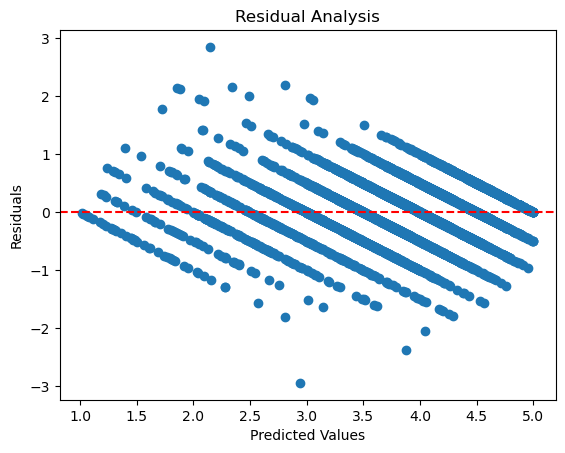

In [81]:
# Residual Analysis
residuals = y_test - y_pred_random_forest
plt.scatter(y_pred_random_forest, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()